In [26]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import time
from datetime import datetime

In [11]:
train = pd.read_csv("data/train.csv")
display(train.head())
display(train.describe())
print(f"Total number of Country/Region affected is {train['Country/Region'].nunique()}")
print(f"Earlies date is {max(train['Date'])}, and latest date is {min(train['Date'])}")

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,33.0,65.0,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,33.0,65.0,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,33.0,65.0,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,33.0,65.0,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,33.0,65.0,2020-01-26,0.0,0.0


,Id,Lat,Long,ConfirmedCases,Fatalities
count,16756.000000,16697.000000,16697.000000,16756.000000,16756.000000
mean,13189.500000,26.337324,5.039603,271.750119,9.221533
std,7624.686932,22.963063,79.935267,3261.152305,141.524582
min,1.000000,-41.454500,-157.498300,0.000000,0.000000
25%,6595.250000,13.193900,-71.530100,0.000000,0.000000
50%,13189.500000,33.000000,10.000000,0.000000,0.000000
75%,19783.750000,42.506300,65.000000,7.000000,0.000000
max,26378.000000,72.000000,174.886000,67800.000000,4032.000000


Total number of Country/Region affected is 163
Earlies date is 2020-03-20, and latest date is 2020-01-22


In [46]:
data_4 = train[train["Country/Region"].isin(["China", "US", "Italy", "Spain"])]
data_4_date = data_4.groupby(["Date", 'Country/Region']).sum().reset_index()
data_4_date["Date"] = pd.to_datetime(data_4_date["Date"])
display(data_4_date.head(5))

,Date,Country/Region,Id,Lat,Long,ConfirmedCases,Fatalities
0,2020-01-22,China,193380,1083.3367,3684.4197,548.0,17.0
1,2020-01-22,Italy,12370,43.0000,12.0000,0.0,0.0
2,2020-01-22,Spain,18508,40.0000,-4.0000,0.0,0.0
3,2020-01-22,US,1308103,2190.7367,-4890.7490,0.0,0.0
4,2020-01-23,China,193413,1083.3367,3684.4197,643.0,18.0


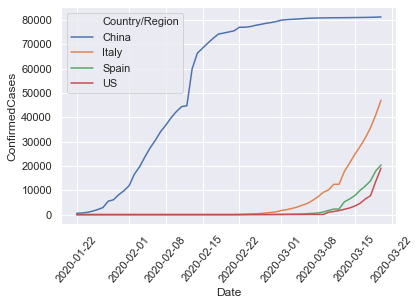

In [52]:
c = sns.lineplot(x='Date', y='ConfirmedCases', hue='Country/Region', data=data_4_date)
c.xaxis.set_tick_params(rotation=50)

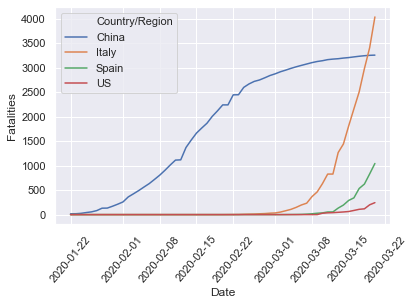

In [53]:
c = sns.lineplot(x='Date', y='Fatalities', hue='Country/Region', data=data_4_date)
c.xaxis.set_tick_params(rotation=50)